In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [15]:
data=pd.read_csv("/content/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#EDA

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [17]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


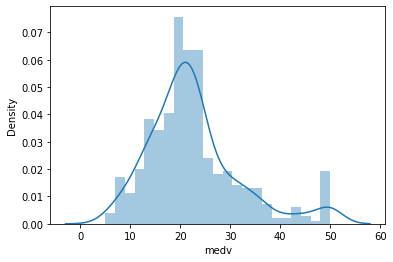

In [19]:
MEDV_plot = sns.distplot(data['medv'])

In [20]:
print("Skewness: %f" % data['medv'].skew())

Skewness: 1.108098


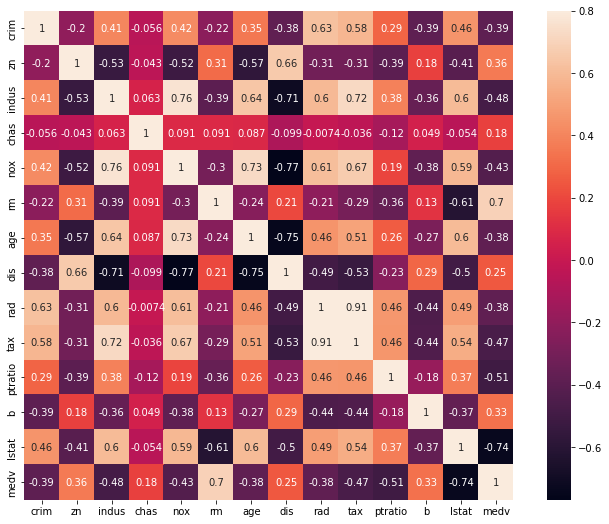

In [29]:
#correlation matrix

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)

In [22]:
x = data.iloc[:,0:13]
y= data.iloc[:,13:14]

In [23]:
#split  train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
model = LinearRegression().fit(x_train, y_train)

In [25]:
model.predict(x_test)

array([[24.9357079 ],
       [23.75163164],
       [29.32638296],
       [11.97534566],
       [21.37272478],
       [19.19148525],
       [20.5717479 ],
       [21.21154015],
       [19.04572003],
       [20.35463238],
       [ 5.44119126],
       [16.93688709],
       [17.15482272],
       [ 5.3928209 ],
       [40.20270696],
       [32.31327348],
       [22.46213268],
       [36.50124666],
       [31.03737014],
       [23.17124551],
       [24.74815321],
       [24.49939403],
       [20.6595791 ],
       [30.4547583 ],
       [22.32487164],
       [10.18932894],
       [17.44286422],
       [18.26103077],
       [35.63299326],
       [20.81960303],
       [18.27218007],
       [17.72047628],
       [19.33772473],
       [23.62254823],
       [28.97766856],
       [19.45036239],
       [11.13170639],
       [24.81843595],
       [18.05294835],
       [15.59712226],
       [26.21043403],
       [20.81140432],
       [22.17349382],
       [15.48367365],
       [22.62261604],
       [24

In [26]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [27]:
#Regression Equation

from sklearn.model_selection import train_test_split
names=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']
for i in range(len(names)):
  x=data[[names[i]]]
  y=data["medv"]
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
  model = LinearRegression().fit(x_train, y_train)
  print(f"The equation of linear regresssion for {names[i]} is : \t",*model.coef_,' x +',model.intercept_)

The equation of linear regresssion for crim is : 	 -0.38356973751281115  x + 23.761115012524463
The equation of linear regresssion for zn is : 	 0.13533697202167833  x + 21.030013210080863
The equation of linear regresssion for indus is : 	 -0.6072761508268087  x + 29.367140754788416
The equation of linear regresssion for chas is : 	 7.8348597701149405  x + 21.878933333333332
The equation of linear regresssion for nox is : 	 -32.77956687726506  x + 40.630174672327854
The equation of linear regresssion for rm is : 	 8.749344338735007  x + -32.551584367809625
The equation of linear regresssion for age is : 	 -0.11599066976498058  x + 30.450233985878867
The equation of linear regresssion for dis is : 	 0.9885074296764752  x + 18.68688142672795
The equation of linear regresssion for rad is : 	 -0.37331482434162205  x + 25.98320723193425
The equation of linear regresssion for tax is : 	 -0.024097979269684794  x + 32.30158554741216
The equation of linear regresssion for ptratio is : 	 -2.110

In [28]:
#Regression Equation

from sklearn.model_selection import train_test_split
names=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']
for i in range(len(names)):
  x=data[[names[i]]]
  y=data["medv"]
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
  model = LinearRegression().fit(x_train, y_train)
  score=model.score(x,y)*100
  print(f"The model score for {names[i]} is : \t",score)

The model score for crim is : 	 14.961120749328572
The model score for zn is : 	 12.960861680973789
The model score for indus is : 	 23.298482098736518
The model score for chas is : 	 2.8877419901343737
The model score for nox is : 	 18.231182748103336
The model score for rm is : 	 48.26855006533882
The model score for age is : 	 14.159701414730463
The model score for dis is : 	 6.180133277922506
The model score for rad is : 	 14.46882618427997
The model score for tax is : 	 21.87439064940202
The model score for ptratio is : 	 25.771944862404528
The model score for b is : 	 11.119483498775018
The model score for lstat is : 	 54.413409537106716
